<h1>1. Importing necessary libraries and attaching data<h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the main dataset
transactions = pd.read_csv("data/transactions.csv")

In [3]:
# import secondary datasets
tr_mcc_codes = pd.read_csv("data/tr_mcc_codes.csv", encoding='utf-8', sep=";")
tr_types = pd.read_csv("data/tr_types.csv", encoding='utf-8', sep=";")
gender_train = pd.read_csv("data/gender_train.csv")
customers_for_sumbission = pd.read_csv("data/gender_test_kaggle_sample_submission.csv")

<h1>2. Exploratory data analysis<h1>

Let's see the structure of the main dataset:

In [4]:
transactions.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


It seems that the column "tr_datetime" include the date and the time of transaction. So we can divide this column to two columns "tr_date", "tr_time":

In [5]:
transactions[['tr_day', 'tr_time']] = transactions.tr_datetime.str.split(' ', 1, expand=True)
transactions = transactions.drop('tr_datetime', axis=1)
transactions['tr_day'] = transactions['tr_day'].astype(int)

Let's divide the column "amount" to two columns:
1. "amount_in" (income) representing income transaction
2. "amount_out" representing outcome transaction

In [6]:
amount_series = transactions.amount
transactions['amount_in'] = amount_series.where(amount_series > 0, 0)
transactions['amount_out'] = amount_series.where(amount_series < 0, 0).abs()
transactions.head(25)
transactions = transactions.drop('amount', axis=1)

And let's see what we get:

In [7]:
display(transactions.head(5))
display(transactions.tail(5))

,customer_id,mcc_code,tr_type,term_id,tr_day,tr_time,amount_in,amount_out
0,39026145,4814,1030,NaN,0,10:23:26,0.00,2245.92
1,39026145,6011,7010,NaN,1,10:19:29,56147.89,0.00
2,39026145,4829,2330,NaN,1,10:20:56,0.00,56147.89
3,39026145,5499,1010,NaN,1,10:39:54,0.00,1392.47
4,39026145,5499,1010,NaN,2,15:33:42,0.00,920.83


,customer_id,mcc_code,tr_type,term_id,tr_day,tr_time,amount_in,amount_out
6849341,61870738,5499,1010,10217113,453,16:03:02,0.00,5176.84
6849342,61870738,5411,1010,022915,454,10:54:60,0.00,1652.77
6849343,61870738,5499,1010,10217113,454,14:23:59,0.00,4687.23
6849344,61870738,5541,1110,RU570124,454,16:11:53,0.00,4491.83
6849345,61870738,6011,7010,372701,454,18:06:30,408756.67,0.00


Observing the structure of tr_mcc_codes and tr_types datasets:

In [8]:
display(tr_mcc_codes.head(5))
display(tr_types.head(5))

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


Observing the structure of gender_train dataset:

In [9]:
gender_train.head(5)

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [10]:
print('The number of the unique values of tr_types: {}'.format(tr_types.tr_type.nunique()))
print('The number of the unique values of tr_mcc_codes: {}'.format(tr_mcc_codes.mcc_code.nunique()))

The number of the unique values of tr_types: 155
The number of the unique values of tr_mcc_codes: 184


Let's merge the main dataset and "tr_mcc_codes" dataset:

In [11]:
transactions_with_mcc = pd.merge(transactions, tr_mcc_codes, on='mcc_code', how='left', sort=False)
transactions_with_mcc.head(10)

,customer_id,mcc_code,tr_type,term_id,tr_day,tr_time,amount_in,amount_out,mcc_description
0,39026145,4814,1030,NaN,0,10:23:26,0.00,2245.92,"Звонки с использованием телефонов, считывающих..."
1,39026145,6011,7010,NaN,1,10:19:29,56147.89,0.00,Финансовые институты — снятие наличности автом...
2,39026145,4829,2330,NaN,1,10:20:56,0.00,56147.89,Денежные переводы
3,39026145,5499,1010,NaN,1,10:39:54,0.00,1392.47,"Различные продовольственные магазины — рынки, ..."
4,39026145,5499,1010,NaN,2,15:33:42,0.00,920.83,"Различные продовольственные магазины — рынки, ..."
5,39026145,5541,1010,NaN,2,15:53:49,0.00,14643.37,Станции техобслуживания
6,39026145,5499,1010,NaN,3,15:29:08,0.00,1010.66,"Различные продовольственные магазины — рынки, ..."
7,39026145,5200,1010,NaN,4,12:11:57,0.00,2829.85,Товары для дома
8,39026145,5499,1010,NaN,5,15:19:19,0.00,628.86,"Различные продовольственные магазины — рынки, ..."
9,39026145,4814,1030,NaN,6,07:08:31,0.00,5614.79,"Звонки с использованием телефонов, считывающих..."


In [12]:
print("The row's counts of the initial main dataset \"transactions\" \
and the resulting \"transactions_with_mcc\" dataset are corresponding to each other: {}".
      format(transactions_with_mcc.shape[0] == transactions.shape[0]))

The row's counts of the initial main dataset "transactions" and the resulting "transactions_with_mcc" dataset are corresponding to each other: True


Let's join "transactions_with_mcc" dataset and "tr_types" dataset:

In [13]:
transactions_full = pd.merge(transactions_with_mcc, tr_types, on='tr_type', how='left', sort=False)
transactions_full.head(10)

,customer_id,mcc_code,tr_type,term_id,tr_day,tr_time,amount_in,amount_out,mcc_description,tr_description
0,39026145,4814,1030,NaN,0,10:23:26,0.00,2245.92,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6011,7010,NaN,1,10:19:29,56147.89,0.00,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,39026145,4829,2330,NaN,1,10:20:56,0.00,56147.89,Денежные переводы,Списание с карты по операции “перевода с карты...
3,39026145,5499,1010,NaN,1,10:39:54,0.00,1392.47,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
4,39026145,5499,1010,NaN,2,15:33:42,0.00,920.83,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
5,39026145,5541,1010,NaN,2,15:53:49,0.00,14643.37,Станции техобслуживания,Покупка. POS ТУ СБ РФ
6,39026145,5499,1010,NaN,3,15:29:08,0.00,1010.66,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
7,39026145,5200,1010,NaN,4,12:11:57,0.00,2829.85,Товары для дома,Покупка. POS ТУ СБ РФ
8,39026145,5499,1010,NaN,5,15:19:19,0.00,628.86,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
9,39026145,4814,1030,NaN,6,07:08:31,0.00,5614.79,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


Let's make a full train dataset:

In [14]:
transactions_full_train = pd.merge(transactions_full, gender_train, how='inner', on="customer_id")
gender_dummies = pd.get_dummies(data=transactions_full_train['gender'], prefix='gender')
transactions_full_train.drop('gender',axis=1, inplace=True)
transactions_full_train = pd.concat([transactions_full_train, gender_dummies], axis=1)
transactions_full_train.head(15)

,customer_id,mcc_code,tr_type,term_id,tr_day,tr_time,amount_in,amount_out,mcc_description,tr_description,gender_0,gender_1
0,39026145,4814,1030,NaN,0,10:23:26,0.00,2245.92,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,1
1,39026145,6011,7010,NaN,1,10:19:29,56147.89,0.00,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),0,1
2,39026145,4829,2330,NaN,1,10:20:56,0.00,56147.89,Денежные переводы,Списание с карты по операции “перевода с карты...,0,1
3,39026145,5499,1010,NaN,1,10:39:54,0.00,1392.47,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,0,1
4,39026145,5499,1010,NaN,2,15:33:42,0.00,920.83,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,0,1
5,39026145,5541,1010,NaN,2,15:53:49,0.00,14643.37,Станции техобслуживания,Покупка. POS ТУ СБ РФ,0,1
6,39026145,5499,1010,NaN,3,15:29:08,0.00,1010.66,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,0,1
7,39026145,5200,1010,NaN,4,12:11:57,0.00,2829.85,Товары для дома,Покупка. POS ТУ СБ РФ,0,1
8,39026145,5499,1010,NaN,5,15:19:19,0.00,628.86,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,0,1
9,39026145,4814,1030,NaN,6,07:08:31,0.00,5614.79,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,1


Let's find out how many NaN values in the term_id column:

In [15]:
nans_percent = round(transactions_full.term_id.isna().sum() / transactions_full.term_id.count() * 100, 2)
print('We have {} % of the NaN values in term_id feature'.format(nans_percent))

We have 67.71 % of the NaN values in term_id feature


In [16]:
transactions_full_train.drop(columns='term_id', inplace=True)

In [17]:
print("The number of rows in the train dataset: {}".format(transactions_full_train.shape[0]))
print("The number of rows in the full dataset: {}".format(transactions_full.shape[0]))

The number of rows in the train dataset: 3751083
The number of rows in the full dataset: 6849346


Making a dataframe grouped by mcc_codes and summarizing how many transactions with definite mcc_code made by customers of each gender:

In [18]:
transactions_grouped_by_mcc = pd.pivot_table(
data=transactions_full_train,
index=['mcc_code'],
values=['gender_0', 'gender_1'],
aggfunc='sum')
transactions_grouped_by_mcc

,gender_0,gender_1
mcc_code,,
742,127.0,38.0
1711,17.0,54.0
1731,7.0,45.0
1799,23.0,56.0
2741,10.0,12.0
...,...,...
9211,39.0,0.0
9222,113.0,184.0
9311,38.0,62.0


Making a dataframe grouped by customer_id and summarizing how many transactions made by of each customer:

In [19]:
transactions_grouped_by_customer = pd.pivot_table(
data=transactions_full_train,
index=['customer_id'],
values=['gender_0', 'gender_1'],
aggfunc='sum')
transactions_grouped_by_customer.head()

,gender_0,gender_1
customer_id,,
22899,0.0,234.0
28753,294.0,0.0
42096,936.0,0.0
49793,0.0,513.0
50940,118.0,0.0


Making a dataframe grouped by customer_id and summarizing amount_in and amount_out of transactions by  each mcc-code:

In [20]:
transactions_amount_grouped_by_mcc = pd.pivot_table(
    data=transactions_full_train,
    index=['mcc_code', 'gender_0', 'gender_1'],
    values=['amount_in', 'amount_out'],
    aggfunc='sum')
transactions_amount_grouped_by_mcc = transactions_amount_grouped_by_mcc.reset_index().set_index('mcc_code')
transactions_amount_grouped_by_mcc['gender'] = transactions_amount_grouped_by_mcc.gender_0.map(lambda x: x == 0).astype(int)
transactions_amount_grouped_by_mcc = transactions_amount_grouped_by_mcc.drop(columns=['gender_0', 'gender_1'])
transactions_amount_grouped_by_mcc.tail(15)

,amount_in,amount_out,gender
mcc_code,,,
8641,0.00,3.253117e+06,1
8641,0.00,1.753671e+06,0
8699,0.00,1.884804e+07,1
8699,0.00,8.861000e+05,0
8999,811831.38,1.465699e+08,1
8999,399045.57,1.088163e+08,0
9211,0.00,8.220052e+05,0
9222,11454.17,6.526557e+06,1
9222,0.00,3.590412e+06,0


Let's see how many unique customers grouped by gender we can find in the train dataset:

In [21]:
transactions_grouped_by_customer.nunique()

gender_0    1120
gender_1    1155
dtype: int64

And how many transactions at all in the train dataset:

In [22]:
transactions_grouped_by_customer.sum().astype(int)

gender_0    1962190
gender_1    1788893
dtype: int32

<h3>Making a horizontal bar plot showing the number of each mcc-code transactions by gender:<h3>

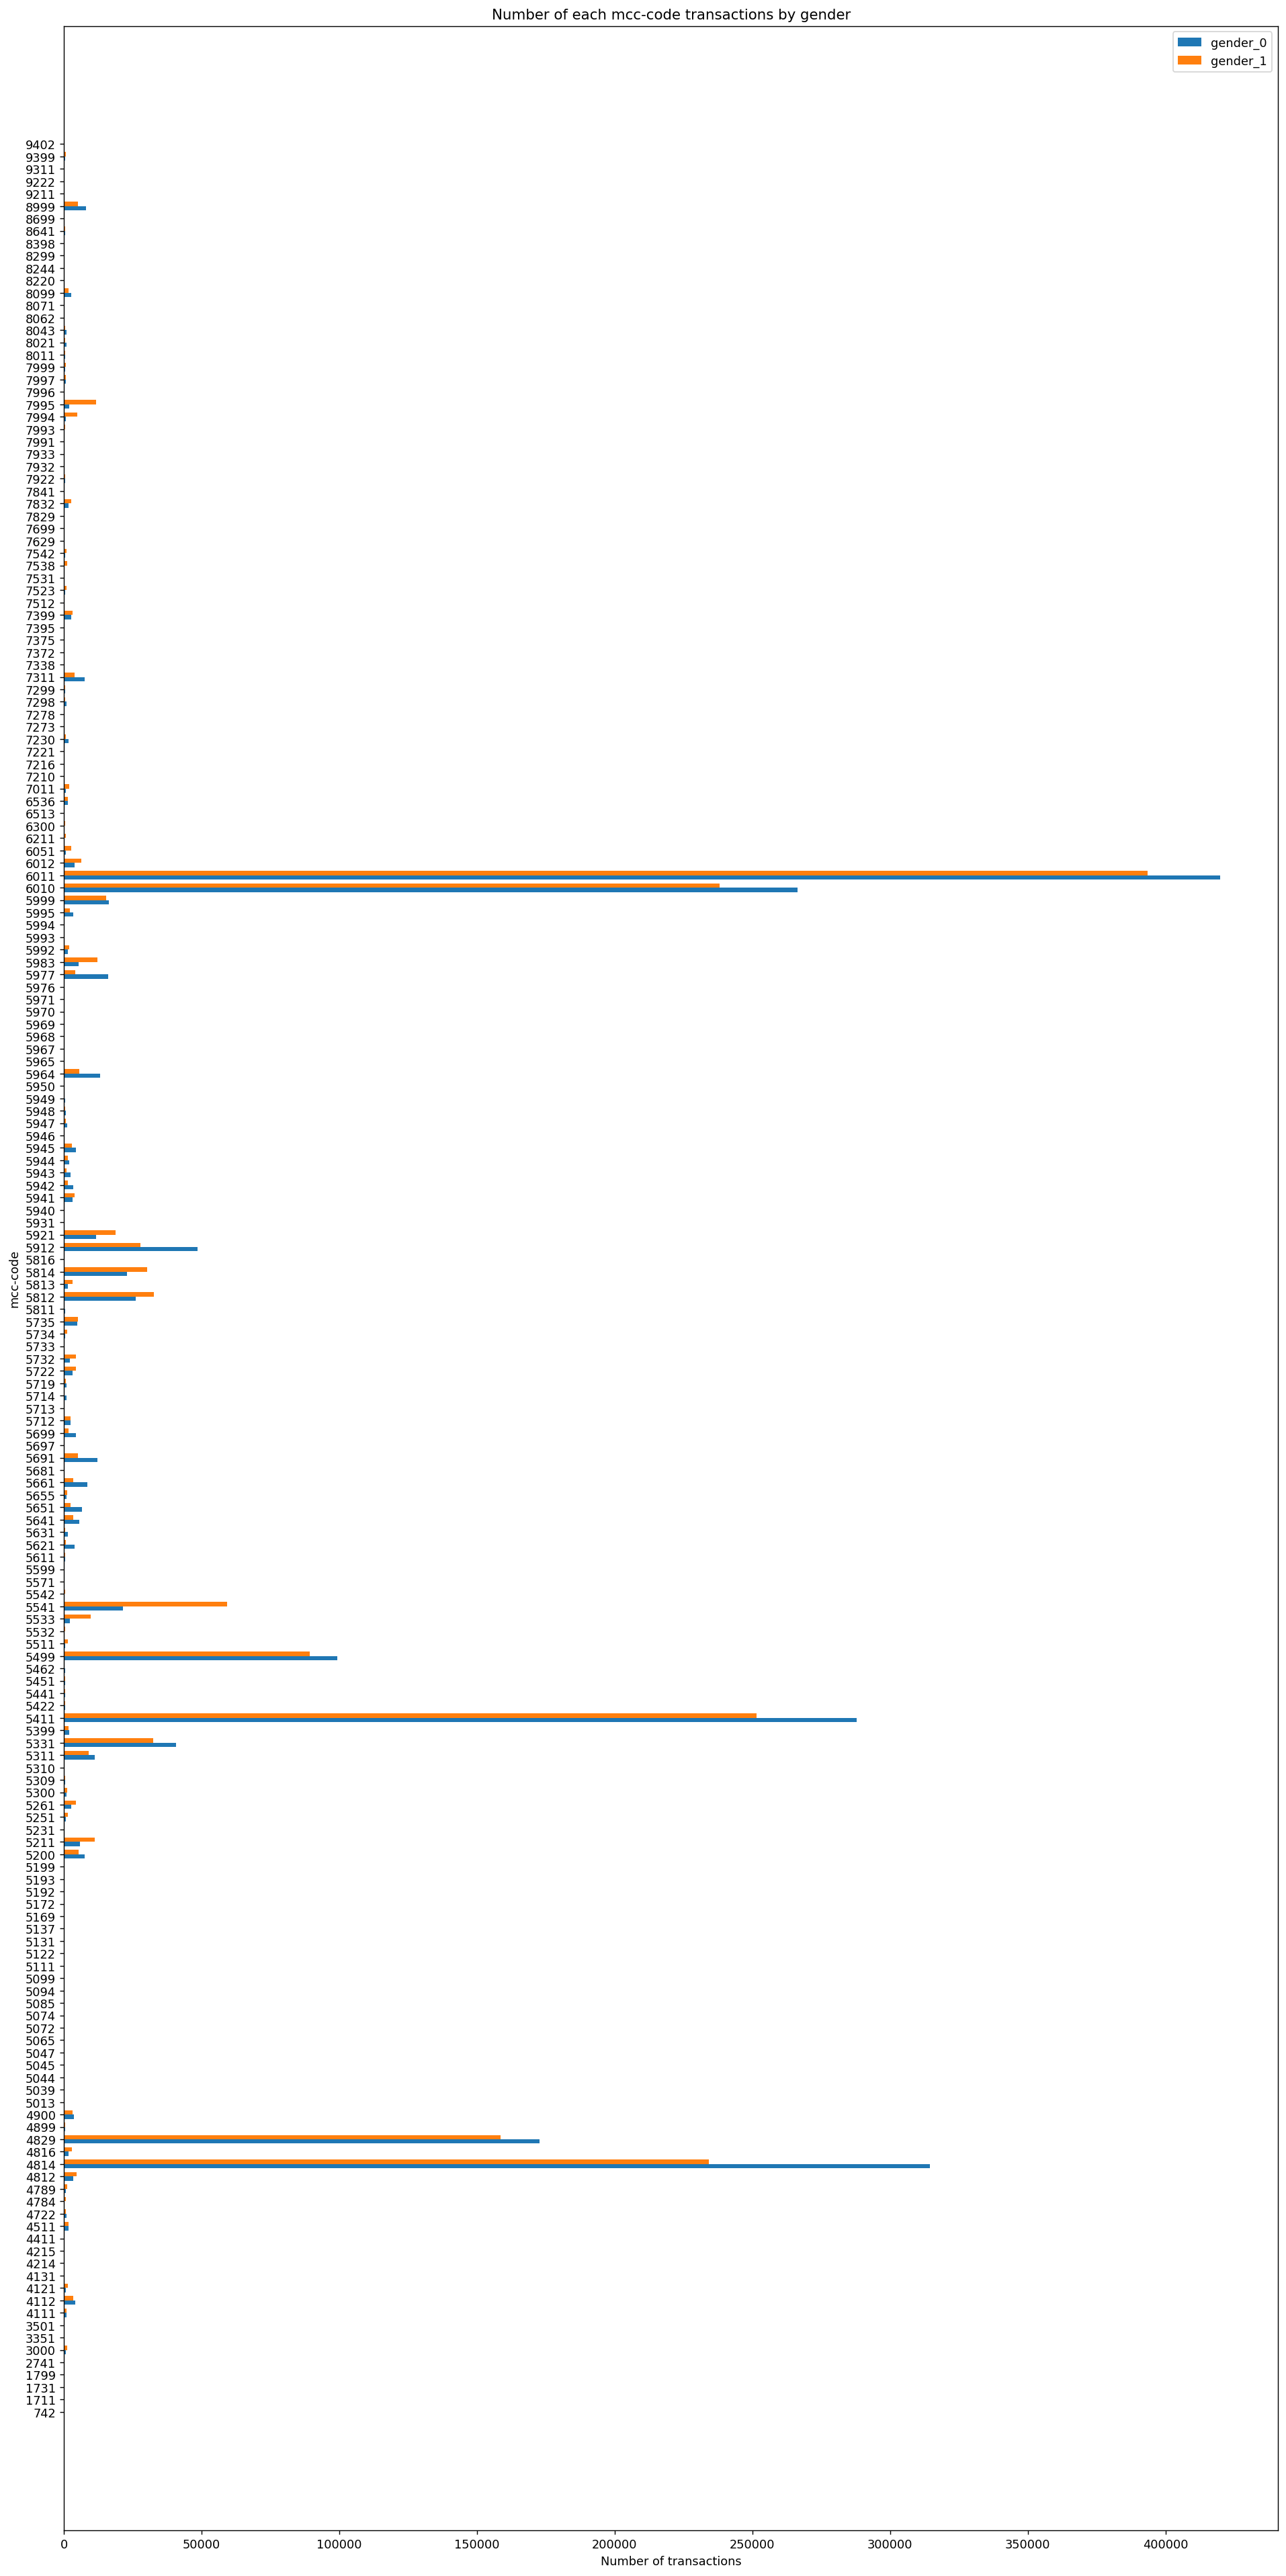

In [23]:
labels = list(transactions_grouped_by_mcc.index)
x1 = list(transactions_grouped_by_mcc.gender_0)
x2 = list(transactions_grouped_by_mcc.gender_1)
y = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 30), dpi=128)
rects1 = ax.barh(y - width/2, x1, width, label='gender_0')
rects2 = ax.barh(y + width/2, x2, width, label='gender_1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('mcc-code')
ax.set_xlabel('Number of transactions')
ax.set_title('Number of each mcc-code transactions by gender')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Customizing font sizes
SMALL_SIZE = 8
SMALL_SIZE_2 = 9
MEDIUM_SIZE = 16
BIG_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE_2)  # fontsize of the xtick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the ytick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title

fig.tight_layout()

plt.show()

Let's filter out mcc-codes which count of transactions by gender have less than 40% relative difference:

In [24]:
mcc_count = []
for mcc, gen0, gen1 in zip(labels, x1, x2):
    if (gen0 == 0 and gen1 != 0) or (gen1 == 0 and gen0 != 0):
        mcc_count.append(mcc)
    elif (gen0 != 0) and (gen1 != 0) and (round(100 * abs(gen0 - gen1) / gen0, 2) > 40):
        mcc_count.append(mcc)
for mcc in mcc_count:
    print(f'Mcc_code={mcc}:', str(transactions_full_train[transactions_full_train.mcc_code == mcc]['mcc_description'].iloc[0]))

Mcc_code=742: Ветеринарные услуги
Mcc_code=1711: Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу
Mcc_code=1731: Подрядчики по электричеству
Mcc_code=1799: Подрядчики, специализированная торговля — нигде более не классифицированные
Mcc_code=3000: Авиалинии, авиакомпании
Mcc_code=3351: Агентства по аренде автомобилей
Mcc_code=3501: Жилье — отели, мотели, курорты
Mcc_code=4121: Лимузины и такси
Mcc_code=4131: Автобусные линии
Mcc_code=4214: Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка
Mcc_code=4784: Дорожный и мостовой сборы, пошлины
Mcc_code=4789: Услуги по транспортировке — нигде более не классифицированные
Mcc_code=4812: Телекоммуникационное оборудование, включая продажу телефонов
Mcc_code=4816: Компьютерная сеть/информационные услуги
Mcc_code=4899: Кабельные и другие платные телевизионные услуги
Mcc_code=5013: Поставщики грузовиков и запчастей
Mcc_code=5039: Строительные материалы — н

So that the initial number of mcc-code can be reduced to:

In [25]:
print('The number of the left mcc-codes: ', len(mcc_count))

The number of the left mcc-codes:  110


In [26]:
df = transactions_amount_grouped_by_mcc
labels1 = list(df[df.gender == 0].index)    # Making a list with mcc-codes for gender = 0
labels2 = list(df[df.gender == 1].index)    # Making a list with mcc-codes for gender = 1
print('These are mcc-codes that we can find in labels1 but not in labels2: ', [i for i in labels1 if i not in labels2])

These are mcc-codes that we can find in labels1 but not in labels2:  [9211]


In [27]:
df = df.drop(index=[9211])  # Drop this mcc-code because we are interested in comparison of transactions with mcc that encounter in gender=0 and gender=1
amount_in_gender_0 = np.array(df[df.gender == 0]['amount_in'])
amount_in_gender_1= np.array(df[df.gender == 1]['amount_in'])
amount_out_gender_0 = np.array(df[df.gender == 0]['amount_out'])
amount_out_gender_1= np.array(df[df.gender == 1]['amount_out'])
labels = list(df.index.unique())
y = np.arange(len(labels))  # the label locations for horizontal bar plot

Let's logarithm amount_in и amount_out to show bar plots in logarithmic scale:

In [28]:
amount_in_gender_0_log = np.log10(amount_in_gender_0, out=np.zeros_like(amount_in_gender_0), where=(amount_in_gender_0 != 0))
amount_in_gender_1_log = np.log10(amount_in_gender_1, out=np.zeros_like(amount_in_gender_1), where=(amount_in_gender_1 != 0))
amount_out_gender_0_log = np.log10(amount_out_gender_0, out=np.zeros_like(amount_out_gender_0), where=(amount_out_gender_0 != 0))
amount_out_gender_1_log = np.log10(amount_out_gender_1, out=np.zeros_like(amount_out_gender_1), where=(amount_out_gender_1 != 0))

<h3>Making a horizontal bar plot showing the sum of amount_in (logarithmated) for each mcc-code<h3>

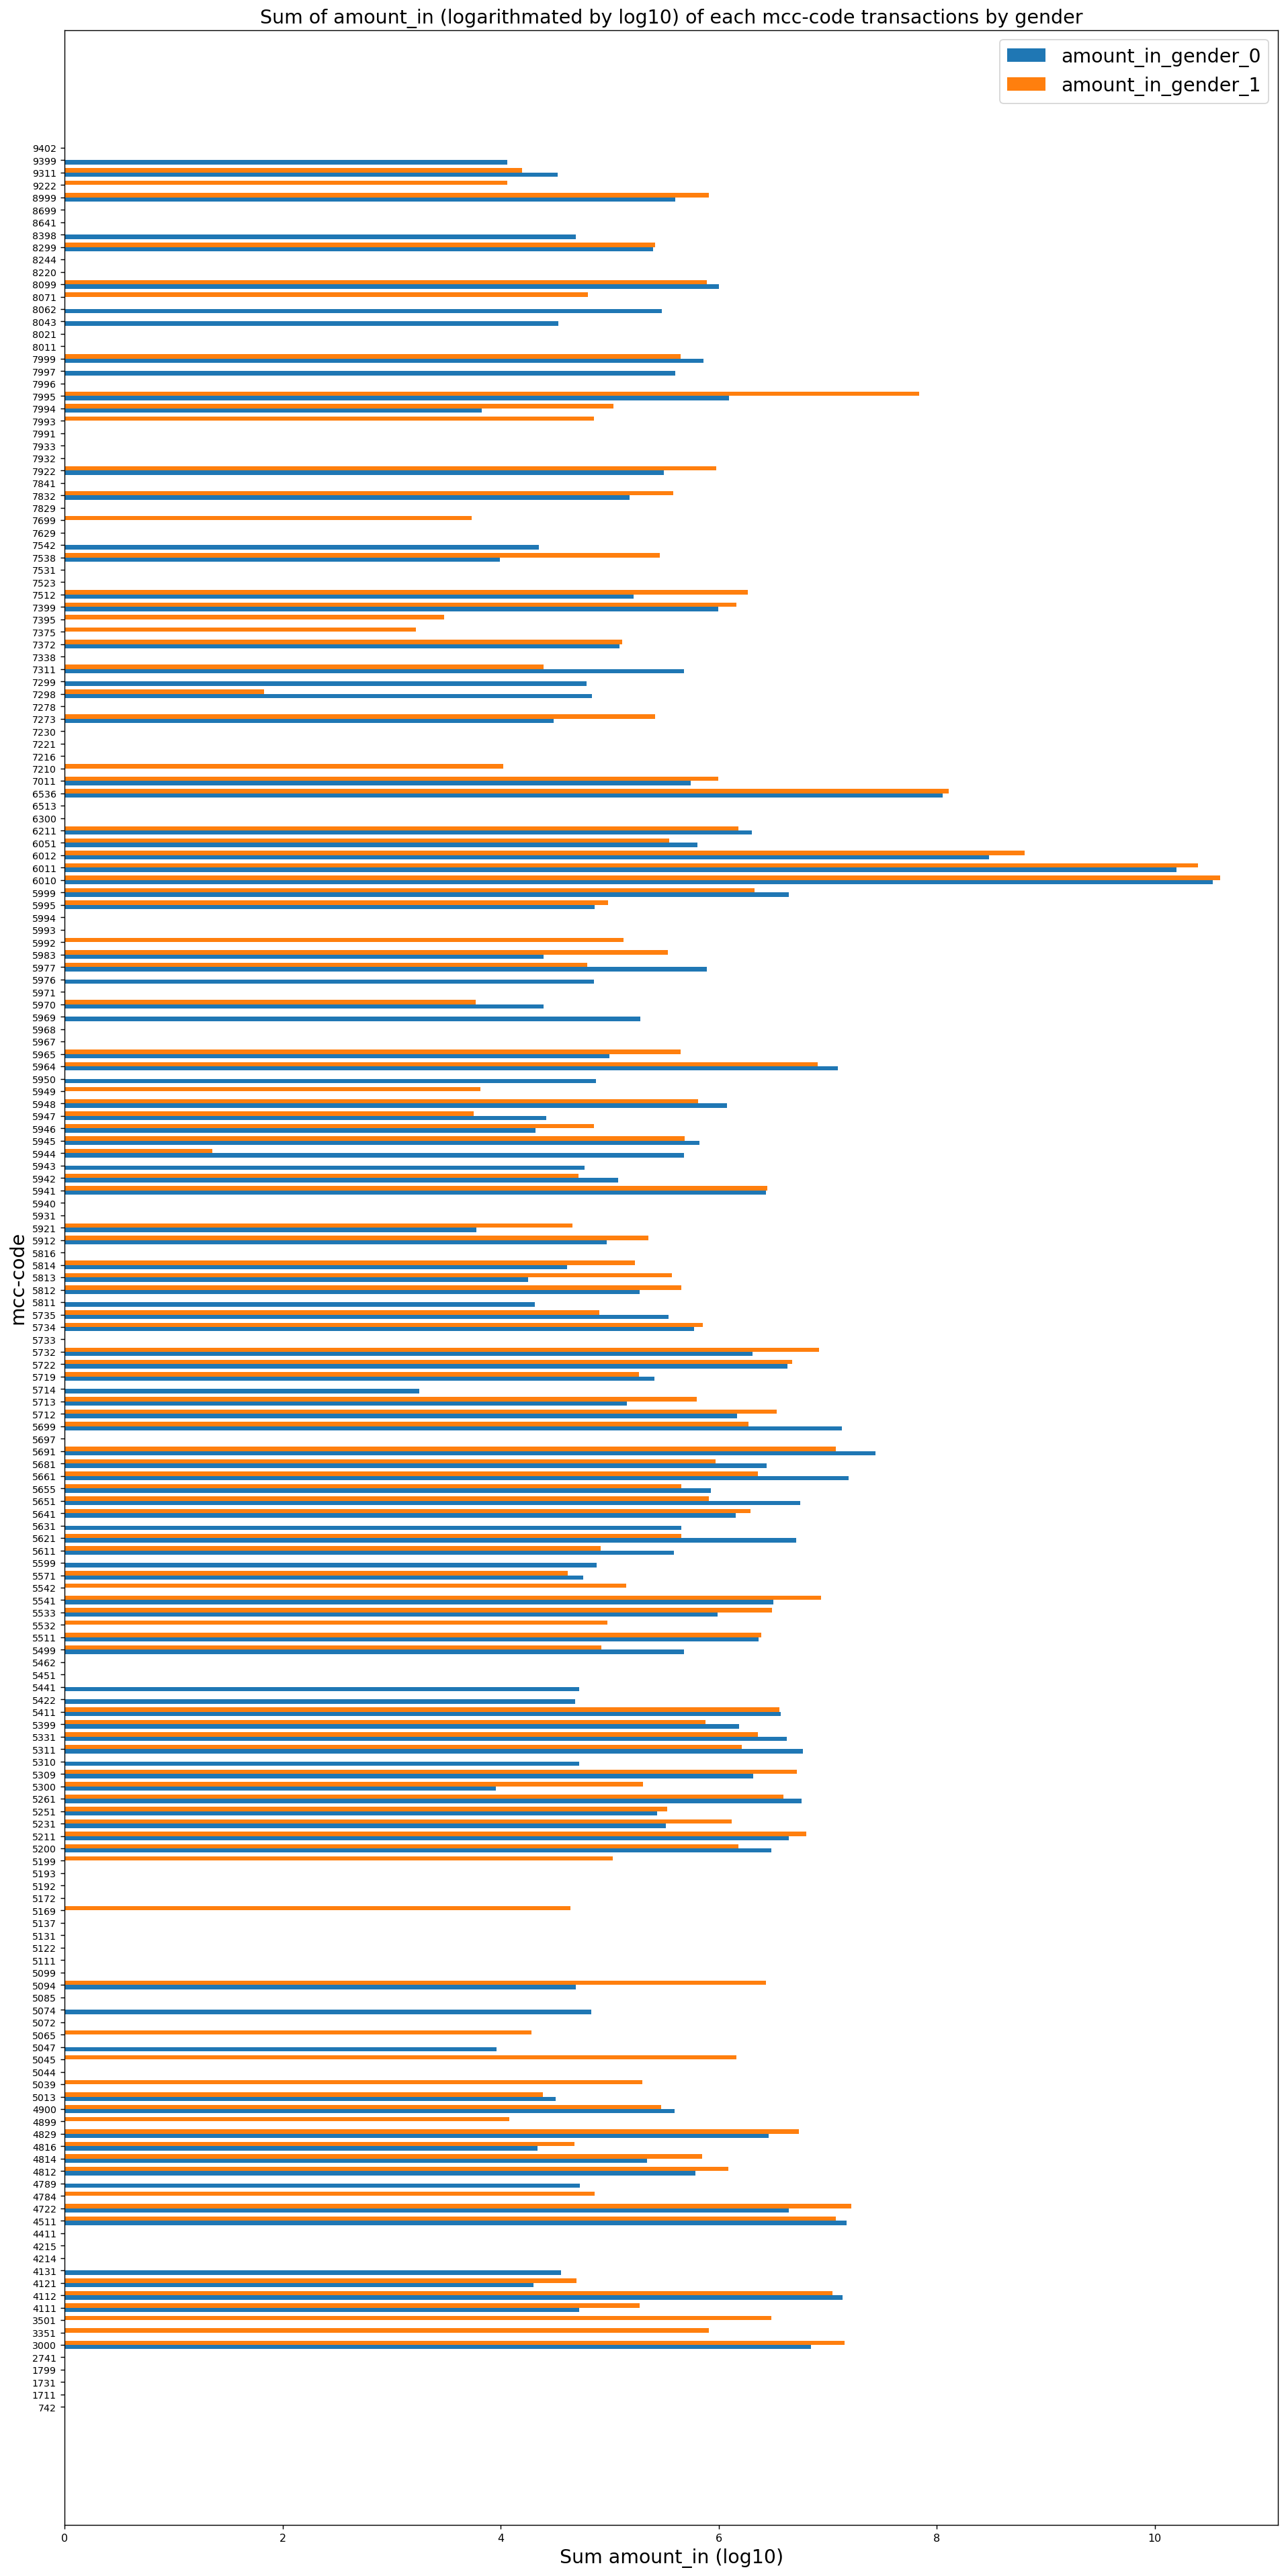

In [29]:
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 30), dpi=128)
rects_in_gend_0 = ax.barh(y - width/2, amount_in_gender_0_log, width, label='amount_in_gender_0')
rects_in_gend_1 = ax.barh(y + width/2, amount_in_gender_1_log, width, label='amount_in_gender_1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('mcc-code')
ax.set_xlabel('Sum amount_in (log10)')
ax.set_title('Sum of amount_in (logarithmated by log10) of each mcc-code transactions by gender')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Customizing font sizes
SMALL_SIZE = 8
SMALL_SIZE_2 = 9
MEDIUM_SIZE = 16
BIG_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE_2)  # fontsize of the xtick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the ytick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title

fig.tight_layout()

plt.show()

Let's list the mcc-codes of transactions for which the values of amount_in are very different (relative difference of more than 25%):

In [30]:
mcc_amount_in = []
for mcc, gen0, gen1 in zip(labels, amount_in_gender_0_log, amount_in_gender_1_log):
    if (gen0 == 0 and gen1 != 0) or (gen1 == 0 and gen0 != 0) or (gen1 < 0 and gen0 > 0) or (gen0 < 0 and gen1 > 0):
        mcc_amount_in.append(mcc)
    elif (gen0 != 0) and (gen1 != 0) and (round(100 * abs(gen0 - gen1) / gen0, 2) > 25):
        mcc_amount_in.append(mcc)
for mcc in mcc_amount_in:
    print(f'Mcc_code={mcc}:', str(transactions_full_train[transactions_full_train.mcc_code == mcc]['mcc_description'].iloc[0]))

Mcc_code=3351: Агентства по аренде автомобилей
Mcc_code=3501: Жилье — отели, мотели, курорты
Mcc_code=4131: Автобусные линии
Mcc_code=4784: Дорожный и мостовой сборы, пошлины
Mcc_code=4789: Услуги по транспортировке — нигде более не классифицированные
Mcc_code=4899: Кабельные и другие платные телевизионные услуги
Mcc_code=5039: Строительные материалы — нигде более не классифицированные
Mcc_code=5045: Компьютеры, периферийное компьютерное оборудование, программное обеспечение
Mcc_code=5047: Стоматологическое/лабороторное/медицинское/офтальмологическое стационарное оборудование и устройства
Mcc_code=5065: Электрические части и оборудование
Mcc_code=5074: Оборудование для водопровода и отопительной системы
Mcc_code=5094: Драгоценные камни и металлы, часы и ювелирные изделия
Mcc_code=5169: Химикалии и смежные вещества, не классифицированные ранее
Mcc_code=5199: Товары недлительного пользования, не классифицированные ранее
Mcc_code=5300: Оптовики
Mcc_code=5310: Магазины, торгующие по снижен

<h3>Making a horizontal bar plot showing the sum of amount_out (logarithmated) for each mcc-code<h3>

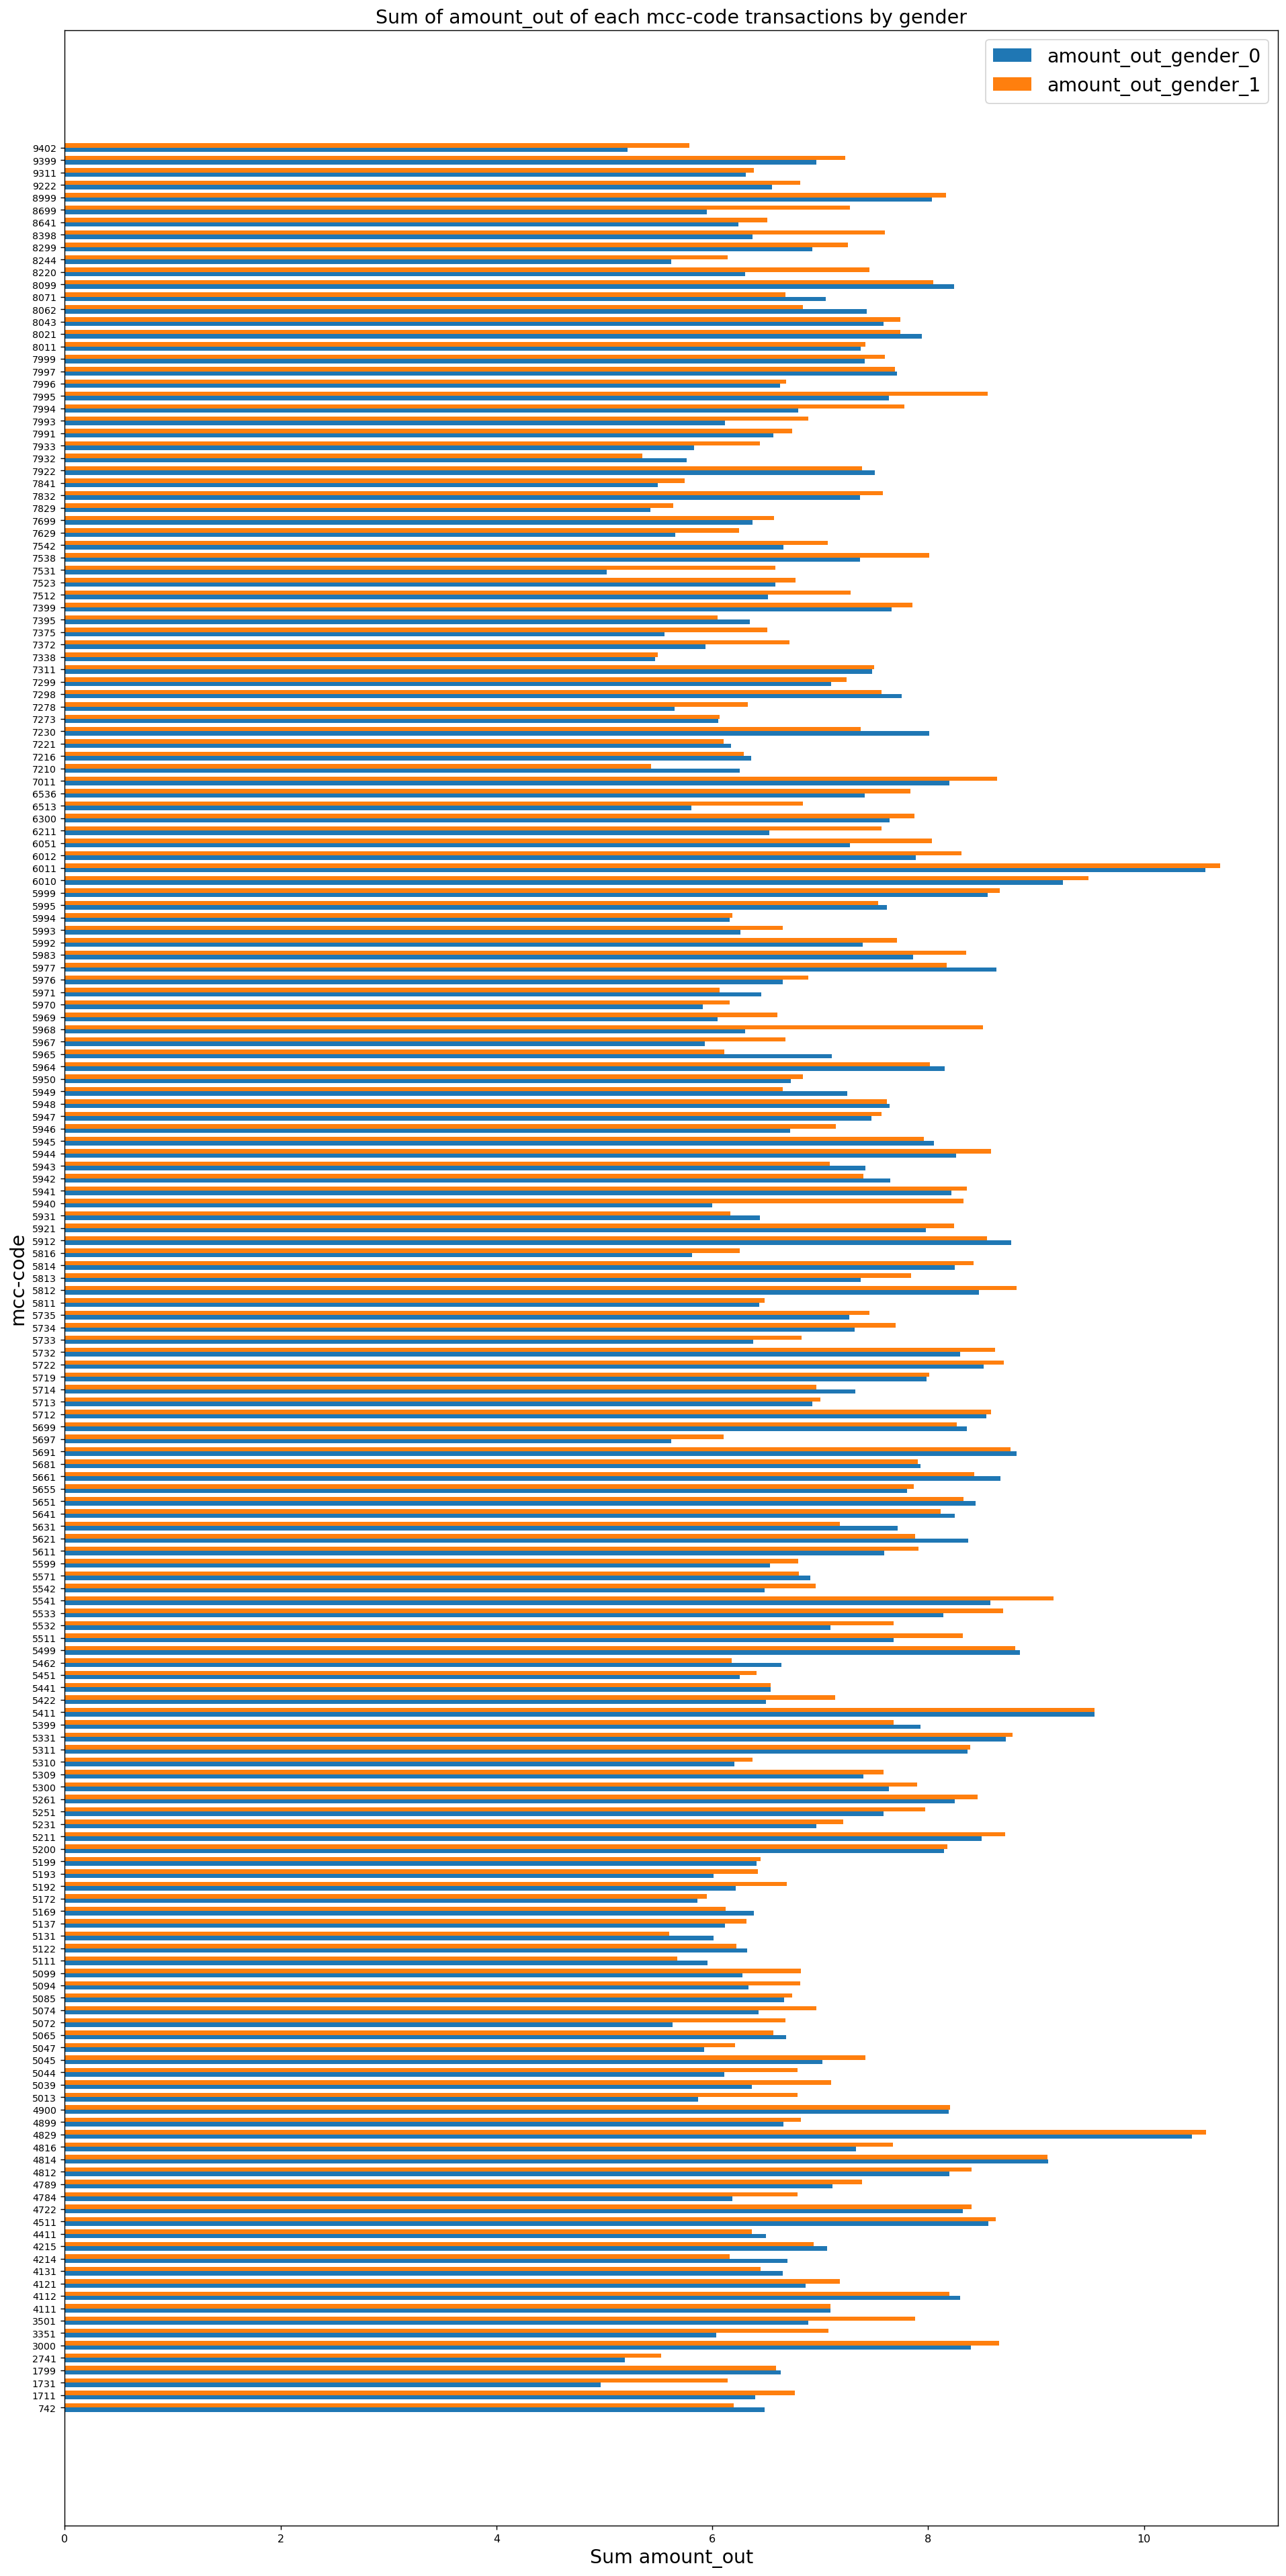

In [31]:
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 30), dpi=128)
rects_out_gend_0 = ax.barh(y - width/2, amount_out_gender_0_log, width, label='amount_out_gender_0')
rects_out_gend_1 = ax.barh(y + width/2, amount_out_gender_1_log, width, label='amount_out_gender_1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('mcc-code')
ax.set_xlabel('Sum amount_out')
ax.set_title('Sum of amount_out of each mcc-code transactions by gender')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
# Customizing font sizes
SMALL_SIZE = 8
SMALL_SIZE_2 = 9
MEDIUM_SIZE = 16
BIG_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE_2)  # fontsize of the xtick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the ytick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title

fig.tight_layout()

plt.show()

Let's list the mcc-codes of transactions for which the values of amount_out are very different (relative difference of more than 25%)

In [32]:
mcc_amount_out = []
for mcc, gen0, gen1 in zip(labels, amount_out_gender_0_log, amount_out_gender_1_log):
    if (gen0 == 0 and gen1 != 0) or (gen1 == 0 and gen0 != 0) or (gen1 < 0 and gen0 > 0) or (gen0 < 0 and gen1 > 0):
        mcc_amount_out.append(mcc)
    elif (gen0 != 0) and (gen1 != 0) and (round(100 * abs(gen0 - gen1) / gen0, 2) > 25):
        mcc_amount_out.append(mcc)
for mcc in mcc_amount_out:
    print(f'Mcc_code={mcc}:', str(transactions_full_train[transactions_full_train.mcc_code == mcc]['mcc_description'].iloc[0]))

Mcc_code=5940: Веломагазины — продажа и обслуживание
Mcc_code=5968: Прямой маркетинг — торговые точки подписки
Mcc_code=7531: Станции технического обслуживания для автомобильного транспорта


In [33]:
# Making a dataframe grouped by tr_types and summarizing how many transactions with definite tr_type
# made by customers of each gender
transactions_grouped_by_tr_type = pd.pivot_table(
data=transactions_full_train,
index=['tr_type'],
values=['gender_0', 'gender_1'],
aggfunc='sum')
transactions_grouped_by_tr_type.head()

,gender_0,gender_1
tr_type,,
1000,5.0,21.0
1010,474122.0,421575.0
1030,310032.0,229538.0
1100,30333.0,34972.0
1110,250170.0,266172.0


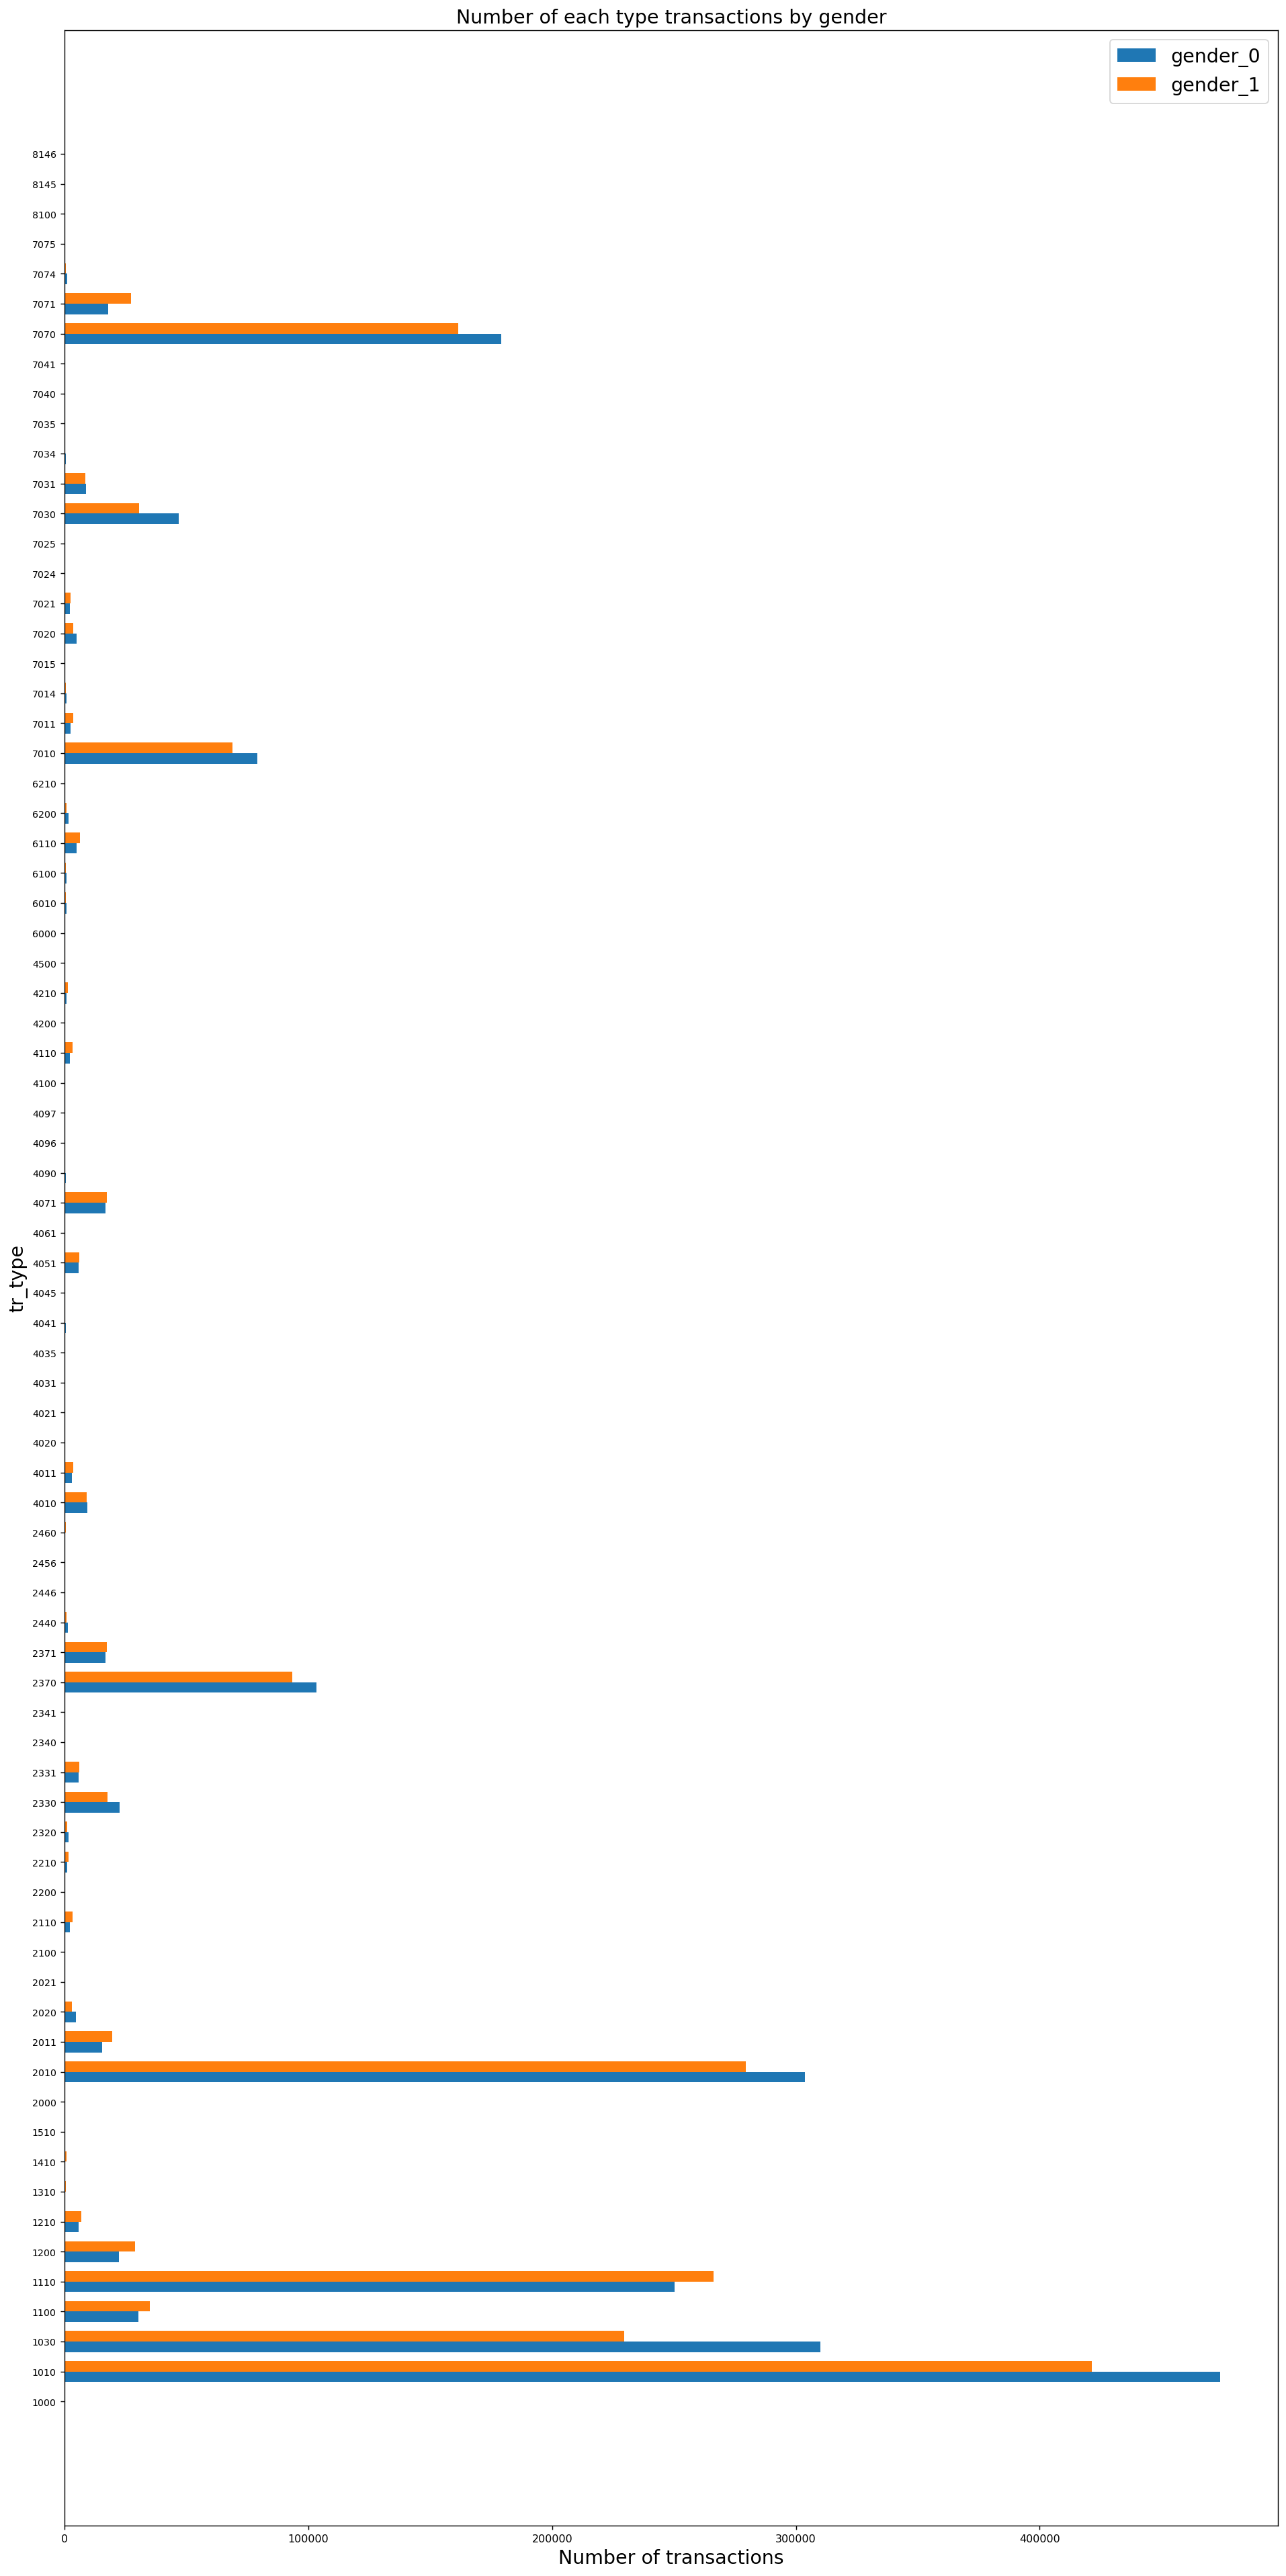

In [34]:
# Making a horizontal bar plot showing the number of each type transactions by gender
labels = list(transactions_grouped_by_tr_type.index)
x1 = list(transactions_grouped_by_tr_type.gender_0)
x2 = list(transactions_grouped_by_tr_type.gender_1)
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 30), dpi=128)
rects1 = ax.barh(y - width/2, x1, width, label='gender_0')
rects2 = ax.barh(y + width/2, x2, width, label='gender_1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('tr_type')
ax.set_xlabel('Number of transactions')
ax.set_title('Number of each type transactions by gender')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Customizing font sizes
SMALL_SIZE = 8
SMALL_SIZE_2 = 10
MEDIUM_SIZE = 16
BIG_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE_2)  # fontsize of the xtick labels
plt.rc('ytick', labelsize=SMALL_SIZE_2)  # fontsize of the ytick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title

fig.tight_layout()

plt.show()

Let's list the tr-types of transactions for which the counts differ more than 15%:

In [35]:
tr_count = []
for tr, gen0, gen1 in zip(labels, x1, x2):
    if (gen0 == 0 and gen1 != 0) or (gen1 == 0 and gen0 != 0):
        mcc_amount_out.append(tr)
    elif (gen0 != 0) and (gen1 != 0) and (round(100 * abs(gen0 - gen1) / gen0, 2) > 15):
        tr_count.append(tr)
for tr in tr_count:
    print(f'Mcc_code={tr}:', str(transactions_full_train[transactions_full_train.tr_type == tr]['tr_description'].iloc[0]))

Mcc_code=1000: Покупка.ТУ СБ РФ
Mcc_code=1030: Оплата услуги. Банкоматы СБ РФ
Mcc_code=1100: Покупка. ТУ  Россия
Mcc_code=1200: Покупка. Зарубеж. ТУ
Mcc_code=1210: Покупка. POS  Зарубеж. ТУ
Mcc_code=1310: н/д
Mcc_code=1410: н/д
Mcc_code=1510: н/д
Mcc_code=2011: Выдача наличных в АТМ Сбербанка (в других ТБ)
Mcc_code=2020: Выдача наличных через POS Сбербанка
Mcc_code=2100: Наличные.  Россия
Mcc_code=2110: Наличные.   АТМ Россия
Mcc_code=2200: Наличные.  Зарубеж. банк
Mcc_code=2210: Наличные.  АТМ Зарубеж. банк
Mcc_code=2320: Безналичный перевод денежных средств через POS
Mcc_code=2330: Списание с карты по операции “перевода с карты на карту” через АТМ (в пределах одного тер.банка)
Mcc_code=2340: Списание с карты по операции “перевода с карты на карту” через POS (в пределах одного тер.банка)
Mcc_code=2341: Списание с карты по операции “перевода с карты на карту” через POS (из одного ТБ в другой ТБ)
Mcc_code=2440: н/д
Mcc_code=2460: nan
Mcc_code=4011: Плата за получение наличных в АТМ Сбер

So that we can reduce the number of tr_types:

In [36]:
print('Initial number of tr_types: ', transactions_full_train.tr_type.nunique())
print('could be reduced to: ', len(tr_count))

Initial number of tr_types:  76
could be reduced to:  56


Let's make dataset for our classification model:

In [37]:
# Dropping some columns that seems to be unuseful
transactions_data = transactions_full.drop(['term_id', 'tr_day', 'tr_time'], axis=1)
transactions_data = transactions_data[
    (transactions_data['mcc_code'].isin(mcc_amount_in) |
    transactions_data['mcc_code'].isin(mcc_amount_out) |
    transactions_data['mcc_code'].isin(mcc_count))]
    #(transactions_data['tr_type'].isin(tr_count))]
transactions_data.head()

,customer_id,mcc_code,tr_type,amount_in,amount_out,mcc_description,tr_description
5,39026145,5541,1010,0.0,14643.37,Станции техобслуживания,Покупка. POS ТУ СБ РФ
10,39026145,5541,1010,0.0,14643.37,Станции техобслуживания,Покупка. POS ТУ СБ РФ
12,39026145,5732,1010,0.0,21897.68,Продажа электронного оборудования,Покупка. POS ТУ СБ РФ
26,39026145,5541,1010,0.0,4873.64,Станции техобслуживания,Покупка. POS ТУ СБ РФ
27,39026145,5541,1010,0.0,14643.37,Станции техобслуживания,Покупка. POS ТУ СБ РФ


In [38]:
print('The size of the initial transactions dataset: ', transactions_full.shape[0])
print('The size of the reduced transactions dataset: ', transactions_data.shape[0])

The size of the initial transactions dataset:  6849346
The size of the reduced transactions dataset:  818122


In [39]:
# Making a dataframe grouped by customer_id and summarizing amount_in, amount_out of all transactions
# made by each customer and each mcc-code
tr_data_sum_amount_by_mcc = pd.pivot_table(
data=transactions_data,
index=['customer_id'],
values=['amount_in', 'amount_out'],
columns=['mcc_code'],
fill_value=0,
aggfunc={'amount_in': 'sum', 'amount_out': 'sum'}).droplevel(0, axis=1)
print('Shape of this dataset: {}'.format(tr_data_sum_amount_by_mcc.shape))
tr_data_sum_amount_by_mcc.head()

Shape of this dataset: (13407, 246)


mcc_code,742,1711,1731,1799,3000,3351,3501,4121,4131,4214,...,8043,8062,8071,8244,8398,8699,9211,9222,9311,9399
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code implements renaming of columns made by pivot table:

In [40]:
middle = int(tr_data_sum_amount_by_mcc.shape[1] / 2)
first_half = tr_data_sum_amount_by_mcc.iloc[:, :middle].\
    rename(columns=lambda x: 'amount_in_mcc_' + str(x), inplace=False)
second_half = tr_data_sum_amount_by_mcc.iloc[:, middle:].\
    rename(columns=lambda x: 'amount_out_mcc_' + str(x), inplace=False)
tr_data_sum_amount_by_mcc = pd.concat([first_half, second_half], axis=1)
tr_data_sum_amount_by_mcc.head()

mcc_code,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8043,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
tr_data_sum_amount_by_mcc = tr_data_sum_amount_by_mcc.reset_index().rename_axis(None, axis=1).set_index('customer_id')
tr_data_sum_amount_by_mcc

,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8043,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980396,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,108028.55,37259.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99984336,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99988578,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dumping dataframe for classification model into .csv file:

In [42]:
tr_data_sum_amount_by_mcc.to_csv('data/df_sum_amount_by_mcc.csv')